# Relationship between COVID-19 Death density per state and other state demographics 

### In this project, my goal is to determine whether or not we can use linear regression to predict the number of deaths per population per state using predictors and discussing the advantages and disadvantages of using linear regression. 

### For this project, I will be using Python to analyse the data, specifically modules such as Matplotlib, Numpy, Pandas and SciKitLearn.  

## Collecting the data
 
 ### COVID-19 Deaths 
The data for the number of deaths per population for each state was found from the website
https://www.cdc.gov/covid-data-tracker/#cases
on the 9th of July 2020 at 18:30 and was downloaded as a csv. 

The other data sources will be shown below.

### Black population per state

https://worldpopulationreview.com/state-rankings/black-population-by-state

### Median age per state

https://worldpopulationreview.com/state-rankings/median-age-by-state

### 2016 US General election proportion republican votes

https://worldpopulationreview.com/state-rankings/2016-election-results-by-state

### 2008 US General election proportion republican votes

https://worldpopulationreview.com/state-rankings/2008-election-results

### Mean IQ per state

https://worldpopulationreview.com/state-rankings/average-iq-by-state

### Most obese states

https://worldpopulationreview.com/state-rankings/most-obese-states

## Merging data

The data in separate CSV files needed was added to a single CSV file by using Microsoft Excel.

In [8]:

%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

# Reading the CSV file 

We use Pandas to read the CSV and then observe the first 5 rows.

In [10]:
state = pd.read_csv('c19allno2.csv')
print(state.head())

   DP100K  BLACKPERC   AGE  PERCREP16  PERCREP08    IQ  OBESE
0    21.6     0.2643  38.9      62.08      60.32  95.7  0.363
1     2.3     0.0309  34.0      51.28      59.42  99.0  0.342
2    27.4     0.0413  37.4      48.67      53.64  97.4  0.295
3    10.1     0.1533  37.9      60.57      58.72  97.5  0.350
4    16.6     0.0553  36.3      31.62      36.95  95.5  0.251


In [5]:
state.head(3)
state.dtypes
state.keys()
state.shape
state.columns

Index(['DP100K', 'BLACKPERC', 'AGE', 'PERCREP16', 'PERCREP08', 'IQ', 'OBESE'], dtype='object')

In [46]:
state.columns

Index(['DP100K', 'BLACKPERC', 'AGE', 'PERCREP16', 'PERCREP08', 'IQ', 'OBESE'], dtype='object')

In [47]:
data = pd.DataFrame(state)
data.head()

,DP100K,BLACKPERC,AGE,PERCREP16,PERCREP08,IQ,OBESE
0,21.6,0.2643,38.9,62.08,60.32,95.7,0.363
1,2.3,0.0309,34.0,51.28,59.42,99.0,0.342
2,27.4,0.0413,37.4,48.67,53.64,97.4,0.295
3,10.1,0.1533,37.9,60.57,58.72,97.5,0.350
4,16.6,0.0553,36.3,31.62,36.95,95.5,0.251


In [50]:
data.describe()

,DP100K,BLACKPERC,AGE,PERCREP16,PERCREP08,IQ,OBESE
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,32.994000,0.102858,38.324000,48.54460,47.105000,100.344000,0.307520
std,39.104968,0.094630,2.383922,11.97554,11.118578,2.707975,0.037334
min,1.300000,0.004200,30.700000,4.07000,6.530000,94.200000,0.226000
25%,10.100000,0.031750,36.900000,41.18000,40.420000,98.475000,0.281750
50%,18.550000,0.070000,38.300000,48.84500,47.565000,100.850000,0.314500
75%,37.700000,0.142425,39.375000,57.66000,56.062500,102.700000,0.331500
max,173.100000,0.375300,44.600000,68.50000,65.650000,104.300000,0.381000


Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

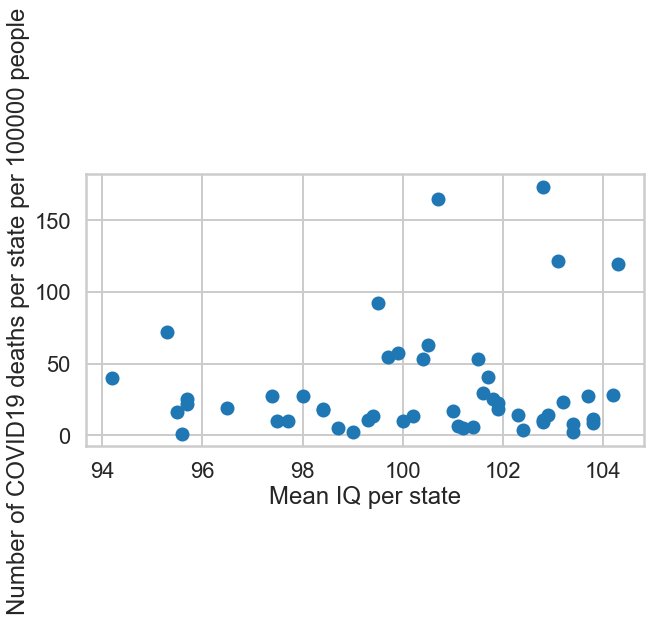

In [56]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.IQ,data.DP100K)
plt.xlabel('Mean IQ per state')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

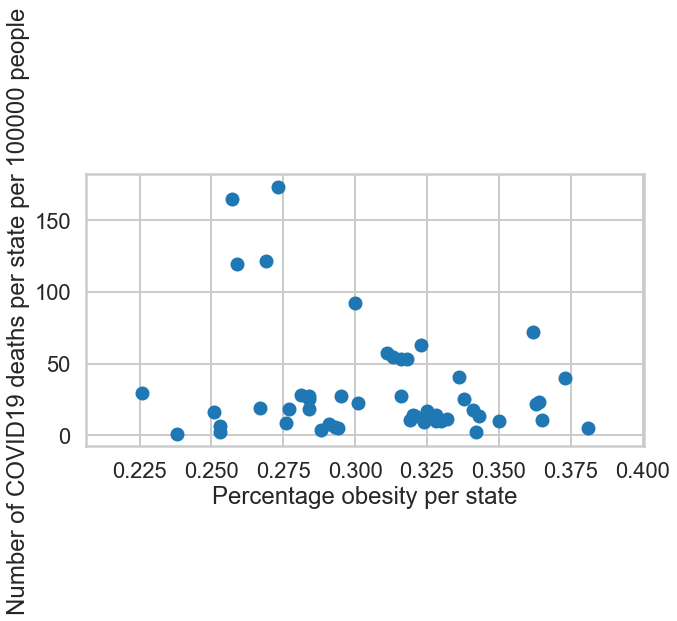

In [59]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.OBESE,data.DP100K)
plt.xlabel('Percentage obesity per state')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

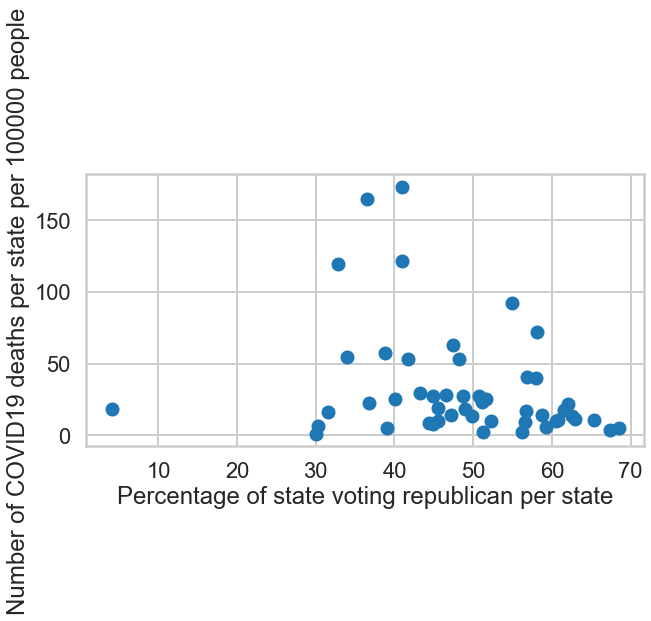

In [62]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.PERCREP16,data.DP100K)
plt.xlabel('Percentage of state voting republican per state 2016')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

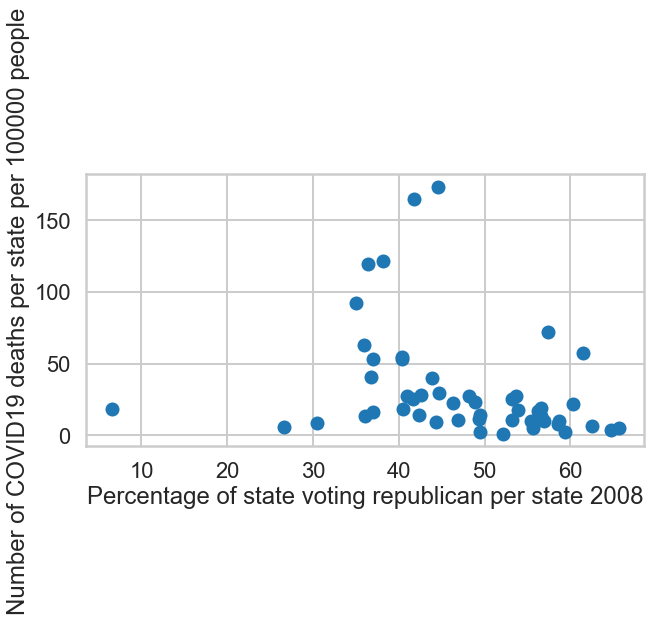

In [63]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.PERCREP08,data.DP100K)
plt.xlabel('Percentage of state voting republican per state 2008')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

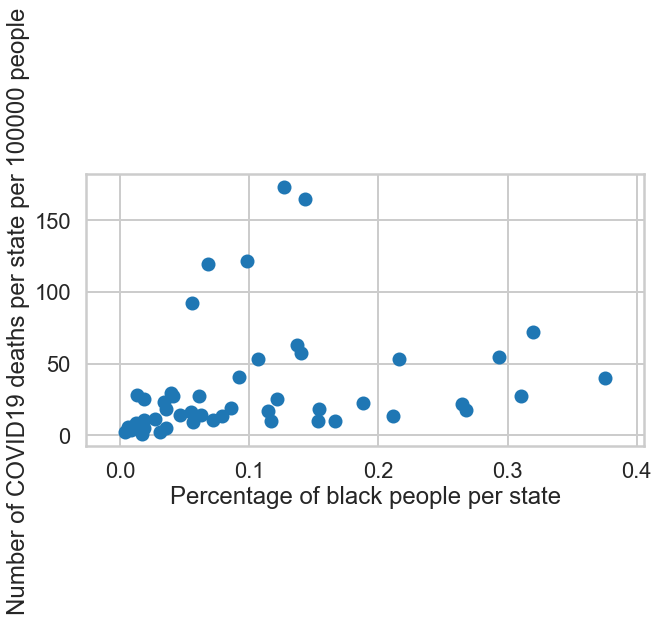

In [66]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.BLACKPERC,data.DP100K)
plt.xlabel('Percentage of black people per state')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

Text(0, 0.5, 'Number of COVID19 deaths per state per 100000 people')

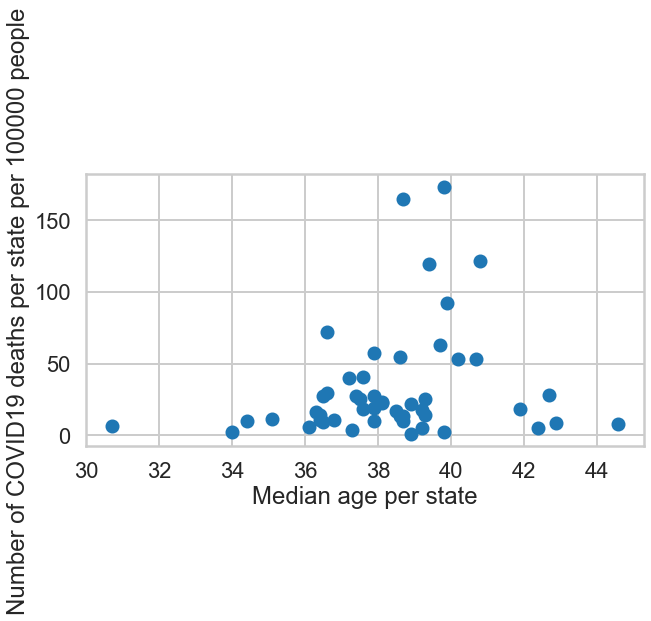

In [68]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.AGE,data.DP100K)
plt.xlabel('Median age per state')
plt.ylabel('Number of COVID19 deaths per state per 100000 people')

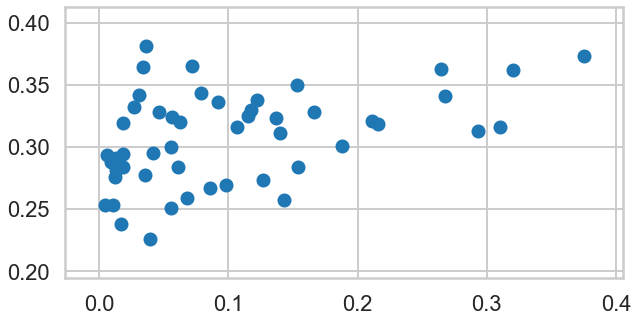

In [72]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.BLACKPERC,data.OBESE)


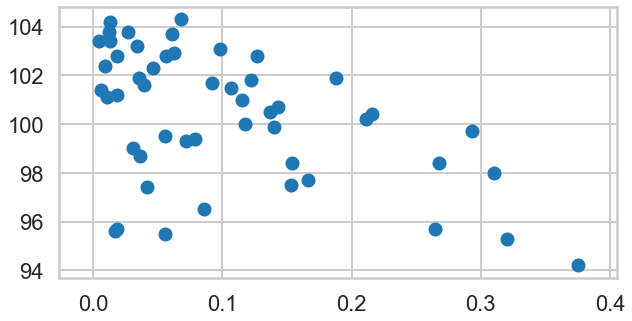

In [74]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.BLACKPERC,data.IQ)


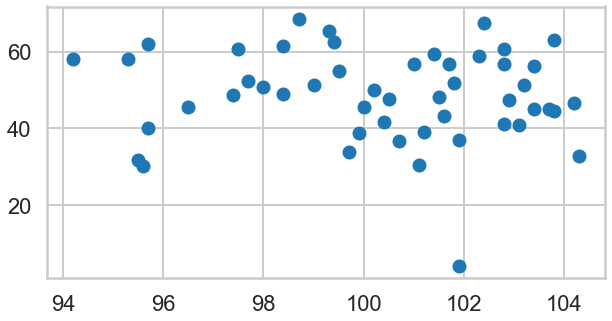

In [77]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.IQ,data.PERCREP16)


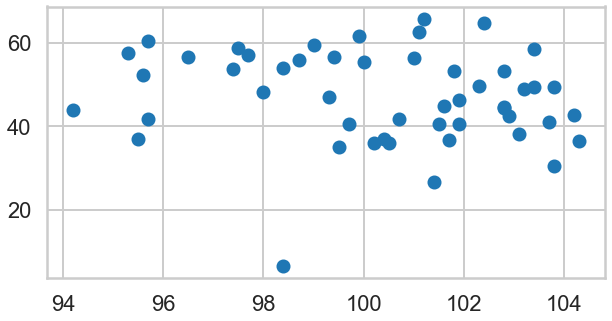

In [78]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(data.IQ,data.PERCREP08)
